# Sentiment Lab

Within the following lab, you will practice a few regex & word2vec concepts. Follow along with the guided code.

In [1]:
!pip install gensim
!pip install nltk

  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/db/af/18b551ae8d26b8731dbe5923565fdf96502bb9aca88a37f241d510c62dc2/gensim-4.3.2-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for smart-open>=1.8.1 from https://files.pythonhosted.org/packages/ad/08/dcd19850b79f72e3717c98b2088f8a24b549b29ce66849cd6b7f44679683/smart_open-7.0.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 1.0 MB/s eta 0:00:0000:010m00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.8 MB/s eta 0:00:00
  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependen

In [25]:
import pandas as pd

import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer, WordNetLemmatizer

import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Word2vec
from gensim.models import Word2Vec

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /Users/carlosm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlosm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/carlosm/nltk_data...


## EDA

First, let's explore some basic components of this dataset regarding its text content and sentiment.

In [12]:
# TODO: import your tweets dataset

df = pd.read_csv("../SENTIMENT/tweets.csv")

In [13]:
# TODO: observe head

df.head()

,sentiment,id,date,NO_QUERY,user,tweet
0,0,1548276360,Fri Apr 17 20:30:47 PDT 2009,NO_QUERY,customcanvasart,@USEOFFORCEENT so sorry for your loss honey I...
1,0,1548276887,Fri Apr 17 20:30:54 PDT 2009,NO_QUERY,KuppyKakejEs,Getting hair done tomorrow.Nawt exicted at all.
2,0,1548276901,Fri Apr 17 20:30:55 PDT 2009,NO_QUERY,zoeydecay,Bored watching Law and Order. Wanting sunday t...
3,0,1548277792,Fri Apr 17 20:31:04 PDT 2009,NO_QUERY,leabella,Actually I had 503 maybe I should put my web...
4,0,1548277960,Fri Apr 17 20:31:05 PDT 2009,NO_QUERY,AnitaKoch,"@lkhalladay Colorado's a beautiful state, but ..."


<Axes: xlabel='sentiment'>

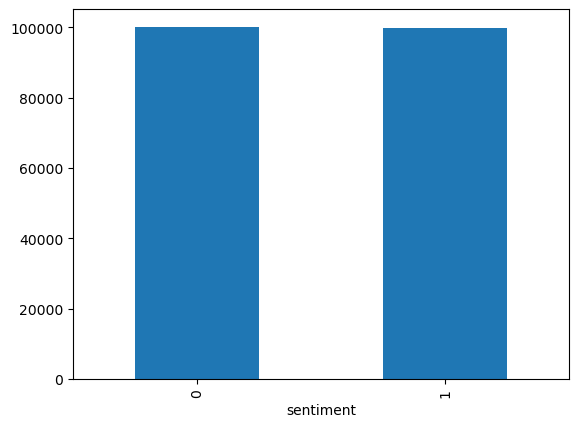

In [6]:
# TODO: view frequency of positive `1` and negative `0` tweets as a bar chart

df["sentiment"].value_counts().plot.bar()

In [14]:
# TODO: convert your `date` column into the datetime type and set it as your index (make sure your index is sorted!)
# NOTE: you can accomplish this via method chaining! See if you can write it out via a chain.

df["date"] = pd.to_datetime(df["date"])

df.set_index("date", inplace=True)

/Users/carlosm/anaconda3/envs/phase1/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Ellipsis

In [15]:
df.head()

,sentiment,id,NO_QUERY,user,tweet
date,,,,,
2009-04-17 20:30:47,0,1548276360,NO_QUERY,customcanvasart,@USEOFFORCEENT so sorry for your loss honey I...
2009-04-17 20:30:54,0,1548276887,NO_QUERY,KuppyKakejEs,Getting hair done tomorrow.Nawt exicted at all.
2009-04-17 20:30:55,0,1548276901,NO_QUERY,zoeydecay,Bored watching Law and Order. Wanting sunday t...
2009-04-17 20:31:04,0,1548277792,NO_QUERY,leabella,Actually I had 503 maybe I should put my web...
2009-04-17 20:31:05,0,1548277960,NO_QUERY,AnitaKoch,"@lkhalladay Colorado's a beautiful state, but ..."


In [56]:
df["sentiment"].value_counts()

sentiment
0    100171
1     99829
Name: count, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200000 entries, 2009-04-17 20:30:47 to 2009-05-27 07:27:35
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  200000 non-null  int64 
 1   id         200000 non-null  int64 
 2   NO_QUERY   200000 non-null  object
 3   user       200000 non-null  object
 4   tweet      200000 non-null  object
dtypes: int64(2), object(3)
memory usage: 9.2+ MB


In [69]:
sent_per_day = df.groupby(df.index.date)["sentiment"].mean()
sent_per_day

2009-04-06    0.602941
2009-04-07    0.589410
2009-04-17    0.557740
2009-04-18    0.582721
2009-04-19    0.585345
2009-04-20    0.572926
2009-04-21    0.596425
2009-05-01    0.575026
2009-05-02    0.580040
2009-05-03    0.584093
2009-05-04    0.581253
2009-05-09    0.590599
2009-05-10    0.587282
2009-05-11    0.548571
2009-05-13    0.557505
2009-05-14    0.599446
2009-05-16    0.593619
2009-05-17    0.643771
2009-05-18    0.626158
2009-05-21    0.632727
2009-05-22    0.641010
2009-05-23    0.400000
2009-05-25    0.500000
2009-05-26    0.630816
2009-05-27    0.551020
2009-05-28    0.612030
2009-05-29    0.596261
2009-05-30    0.615677
2009-05-31    0.624580
2009-06-01    0.602210
2009-06-02    0.607770
2009-06-03    0.610481
2009-06-04    0.601871
2009-06-05    0.598253
2009-06-06    0.602630
2009-06-07    0.602100
2009-06-14    0.604440
2009-06-15    0.585274
2009-06-16    0.360938
2009-06-17    0.000000
2009-06-18    0.000000
2009-06-19    0.000000
2009-06-20    0.000000
2009-06-21 

In [19]:
# TODO: view the average sentiment of tweets on a daily basis

df["date"].mean().sum()

date
2009-04-06    0.602941
2009-04-07    0.589410
2009-04-08         NaN
2009-04-09         NaN
2009-04-10         NaN
                ...   
2009-06-21    0.000000
2009-06-22    0.000000
2009-06-23    0.000000
2009-06-24    0.000000
2009-06-25    0.000000
Freq: D, Name: sentiment, Length: 81, dtype: float64

In [22]:
# TODO: view the average sentiment of tweets on a 2-day basis

...

date
2009-04-06    0.591566
2009-04-08         NaN
2009-04-10         NaN
2009-04-12         NaN
2009-04-14         NaN
2009-04-16    0.557740
2009-04-18    0.584186
2009-04-20    0.580376
2009-04-22         NaN
2009-04-24         NaN
2009-04-26         NaN
2009-04-28         NaN
2009-04-30    0.575026
2009-05-02    0.582304
2009-05-04    0.581253
2009-05-06         NaN
2009-05-08    0.590599
2009-05-10    0.581838
2009-05-12    0.557505
2009-05-14    0.599446
2009-05-16    0.634247
2009-05-18    0.626158
2009-05-20    0.632727
2009-05-22    0.640032
2009-05-24    0.500000
2009-05-26    0.625266
2009-05-28    0.599045
2009-05-30    0.619894
2009-06-01    0.604250
2009-06-03    0.609155
2009-06-05    0.601115
2009-06-07    0.602100
2009-06-09         NaN
2009-06-11         NaN
2009-06-13    0.604440
2009-06-15    0.499933
2009-06-17    0.000000
2009-06-19    0.000000
2009-06-21    0.000000
2009-06-23    0.000000
2009-06-25    0.000000
Freq: 2D, Name: sentiment, dtype: float64

<Axes: xlabel='date'>

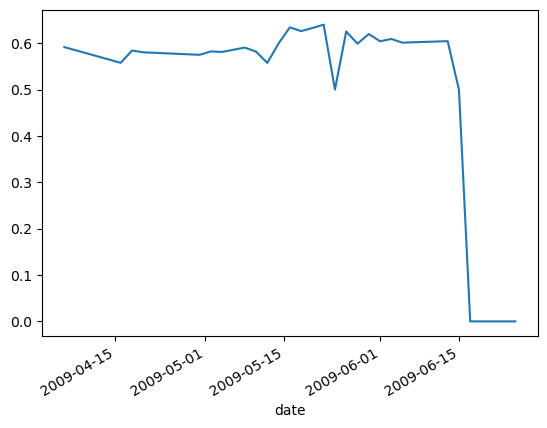

In [24]:
# TODO: plot the above dataframe as a line plot in order to see a 'trend" of sentiment (make sure to drop all null values before plotting!)
# NOTE: This is also something you can accomplish via method chaining

...

In [25]:
# TODO: view the average sentiment of tweets on a 1-week basis

...

date
2009-04-12    0.591566
2009-04-19    0.582546
2009-04-26    0.580376
2009-05-03    0.581517
2009-05-10    0.586233
2009-05-17    0.617389
2009-05-24    0.633368
2009-05-31    0.613718
2009-06-07    0.603248
2009-06-14    0.604440
2009-06-21    0.240198
2009-06-28    0.000000
Freq: W-SUN, Name: sentiment, dtype: float64

<Axes: xlabel='date'>

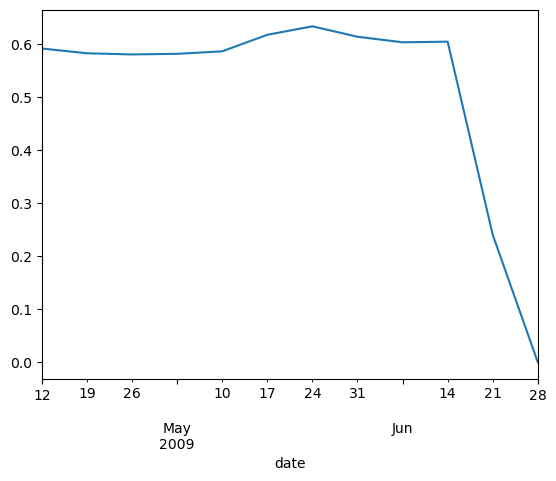

In [26]:
# TODO: plot the above dataframe as a line plot in order to see a 'trend" of sentiment (make sure to drop all null values before plotting!)
# NOTE: This is also something you can accomplish via method chaining

...

In [40]:
# TODO: Using regex, find all rows that contain the word 'hate'

...

,sentiment,id,NO_QUERY,user,tweet
date,,,,,
2009-04-17 20:42:20,1,1548347932,NO_QUERY,SwaggCertified,@lootylove haha there was NO hate in that mess...
2009-04-17 21:05:29,0,1548488103,NO_QUERY,reitzfamily,Going to bed and hoping my nerves will let me ...
2009-04-17 21:11:34,0,1548524122,NO_QUERY,cooldude13233,"@pinkee hnn, text me (or call me :\) if you wa..."
2009-04-17 21:50:36,0,1548744445,NO_QUERY,lauraelizabethm,I hate this live feed. They need a Texas C-SPAN.
2009-04-17 22:02:32,1,1548811333,NO_QUERY,alina_wang,@DaniKillafornia haha...thanks!!! i hate flyi...
...,...,...,...,...,...
2009-05-13 23:04:56,1,1792419545,NO_QUERY,LayneCullen,@ddlovato My role model is back.. I miss your...
2009-05-13 23:06:22,0,1792427880,NO_QUERY,KillingKansas,I literally feel sick without him...I hate tha...
2009-05-13 23:34:04,0,1792579175,NO_QUERY,raphnix,is feeling sick today. I'm going to hate oreo ...


In [28]:
# TODO: Using regex, find all rows that contain the word 'love'

...

,sentiment,id,NO_QUERY,user,tweet
date,,,,,
2009-04-17 20:32:07,1,1548284663,NO_QUERY,lolamirabella,I feel well I listened to my instincts and ha...
2009-04-17 20:35:52,0,1548308000,NO_QUERY,janeyjaney,...... Oh how i love being awake at stupid o'c...
2009-04-17 20:37:22,1,1548317710,NO_QUERY,jessicaa323,@ludajuice i like luda's twitter status love...
2009-04-17 20:42:04,1,1548346238,NO_QUERY,mnm310,"@RyanSeacrest No, i'd totally love it"
2009-04-17 20:42:20,1,1548347932,NO_QUERY,SwaggCertified,@lootylove haha there was NO hate in that mess...
...,...,...,...,...,...
2009-05-13 23:41:10,1,1792616317,NO_QUERY,CicelyElizabeth,@realwizkhalifa I love your glasses (RealWiz...
2009-05-27 07:19:19,1,1936026795,NO_QUERY,redlantern64,I think I may be a bit too liberal with the &q...
2009-05-27 07:21:07,0,1936043550,NO_QUERY,wizum,Slow moving Wednesday... don't you just love t...


## Word2Vec

Let's analyze the content of our tweets using a word2vec model. First, we'll go through a small toy-example to show off the power of word-2-vec. Next, we'll apply it to our dataset for its predictive capabilities.

In [26]:
import string

# TODO: word2vec example. Notice each step that we take and the output that it makes.

text = """
"Achieving the basic complexity and capacity of the human brain will not automatically result in computers matching the flexibility of human intelligence. The organization and content of these resources -- the software of intelligence -- is equally important.\\n\
One approach to emulating the brain's software is through reverse engineering -- scanning a human brain (which will be achievable early in the next century) and essentially copying its neural circuitry in a neural computer (a computer designed to simulate a massive number of human neurons) of sufficient capacity.\\n\
There is a plethora of credible scenarios for achieving human-level intelligence in a machine. We will be able to evolve and train a system combining massively parallel neural nets with other paradigms to understand language and model knowledge, including the ability to read and understand written documents.\\n\
Although the ability of today's computers to extract and learn knowledge from natural-language documents is quite limited, their abilities in this domain are improving rapidly. Computers will be able to read on their own, understanding and modeling what they have read, by the second decade of the twenty-first century.\\n\
We can then have our computers read all of the world's literature -- books, magazines, scientific journals, and other available material. Ultimately, the machines will gather knowledge on their own by venturing into the physical world, drawing from the full spectrum of media and information services, and sharing knowledge with each other (which machines can do far more easily than their human creators).\\n\
Once a computer achieves a human level of intelligence, it will necessarily roar past it. Since their inception, computers have significantly exceeded human mental dexterity in their ability to remember and process information.\\n\
A computer can remember billions or even trillions of facts perfectly, while we are hard pressed to remember a handful of phone numbers. A computer can quickly search a database with billions of records in fractions of a second. Computers can readily share their knowledge bases.\\n\
The combination of human-level intelligence in a machine with a computer's inherent superiority in the speed, accuracy, and sharing ability of its memory will be formidable.\\n\
Mammalian neurons are marvelous creations, but we wouldn't build them the same way. Much of their complexity is devoted to supporting their own life processes, not to their information-handling abilities.\\n\
Furthermore, neurons are extremely slow; electronic circuits are at least a million times faster. Once a computer achieves a human level of ability in understanding abstract concepts, recognizing patterns, and other attributes of human intelligence, it will be able to apply this ability to a knowledge base of all human-acquired -- and machine-acquired -- knowledge."
"""

corpus_lst = text.split(".")

lemma = WordNetLemmatizer()

# break data into tokens and remove stop-words
data = []
for sent in corpus_lst:
  new_sent = []
  for word in sent.split():
    new_word = word.lower()
    if (new_word[0] not in string.punctuation) and (new_word[0] not in stopwords.words('english')):
      new_sent.append(lemma.lemmatize(new_word))
  if len(new_sent) > 0:
    data.append(new_sent)

for sentence in data:
  print(sentence)

['basic', 'complexity', 'capacity', 'human', 'brain', 'will', 'not', 'result', 'computer', 'flexibility', 'human']
['content', 'resource', 'equally']
['emulating', "brain's", 'reverse', 'engineering', 'human', 'brain', 'will', 'be', 'early', 'next', 'century)', 'essentially', 'copying', 'neural', 'circuitry', 'neural', 'computer', 'computer', 'number', 'human', 'neurons)', 'capacity']
['plethora', 'credible', 'for', 'human-level']
['we', 'will', 'be', 'evolve', 'combining', 'parallel', 'neural', 'net', 'with', 'paradigm', 'understand', 'language', 'knowledge,', 'read', 'understand', 'written']
['computer', 'extract', 'learn', 'knowledge', 'from', 'natural-language', 'quite', 'limited,', 'rapidly']
['computer', 'will', 'be', 'read', 'understanding', 'what', 'have', 'read,', 'by', 'century']
['can', 'have', 'computer', 'read', "world's", 'literature', 'books,', 'journals,']
['ultimately,', 'will', 'gather', 'knowledge', 'by', 'venturing', 'physical', 'world,', 'from', 'full', 'knowledge'

In [27]:
# Create a word2vec model

w2v_toy = Word2Vec(sentences=data)

In [28]:
# train the word2vec model

w2v_toy.train(data, total_examples=len(data), epochs=10)

(35, 1790)

In [29]:
# word2vec removes infrequently used words, so unfortunately it only "learned" the meaning of a few words

w2v_toy.wv.key_to_index

{'computer': 0, 'human': 1, 'will': 2, 'knowledge': 3, 'can': 4, 'be': 5}

In [30]:
# Let's the view output of one word in our word2vec model...

w2v_toy.wv["computer"]

# doesn't make too much sense at the moment

array([-5.9188023e-04,  2.7718098e-04,  5.0919815e-03,  9.0179127e-03,
       -9.2972219e-03, -7.1296468e-03,  6.4876350e-03,  9.0343347e-03,
       -5.0357059e-03, -3.7788351e-03,  7.4066287e-03, -1.5195583e-03,
       -4.5531681e-03,  6.5561957e-03, -4.8501627e-03, -1.8481105e-03,
        2.9111633e-03,  1.0041554e-03, -8.3333002e-03, -9.4736293e-03,
        7.3269908e-03,  5.0469339e-03,  6.8317647e-03,  8.0939929e-04,
        6.3384986e-03, -3.4114509e-03, -9.1726775e-04,  5.8144396e-03,
       -7.5664558e-03, -3.9325845e-03, -7.4981609e-03, -9.5542625e-04,
        9.5327133e-03, -7.3810294e-03, -2.3143610e-03, -1.9260679e-03,
        8.1285723e-03, -5.9481808e-03,  2.1778547e-05, -4.7304705e-03,
       -9.6124914e-03,  5.0151190e-03, -8.7984884e-03, -4.3830257e-03,
        7.6461884e-06, -2.9848510e-04, -7.6605259e-03,  9.6349232e-03,
        4.9931710e-03,  9.2315581e-03, -8.1496239e-03,  4.5075468e-03,
       -4.1582054e-03,  7.8085891e-04,  8.4818071e-03, -4.4961278e-03,
      

In [31]:
# let's contextualize this! What are the most similar words to "computer"

w2v_toy.wv.most_similar("computer")[0]

# AMAZING! (the score is the cosine similarity of 'human' with 'computer')

('human', -0.01045301929116249)

Now, let's apply this model to our 200,000 row dataset.

In [32]:
# Preprocess your tweet column

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [33]:
# Apply this preprocessing to the tweet column

df.tweet = df.tweet.apply(lambda x: preprocess(x))

In [34]:
# get a sample of 5 random tweets

df["tweet"].sample(5)

date
2009-04-21 01:25:31    seems like connecting private server ip instea...
2009-06-07 20:02:30    thank much good music u look right places pref...
2009-06-17 03:07:26                     whole body burnt skin dehydrated
2009-06-19 12:31:17                                          boo country
2009-06-17 06:25:08                                             eek good
Name: tweet, dtype: object

In [35]:
# create a train,test split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 160000
TEST size: 40000


In [36]:
# tokenize your data

sentences = [t.split() for t in df_train.tweet] 

In [37]:
sentences

[['baket', 'mo', 'ba', 'iyong', 'pinaasa'],
 ['damn', 'feels', 'empty', 'happy', 'guys', 'around', 'mroda'],
 ['ha', 'eat', 'junk', 'food', 'sometimes', 'phew', 'lol'],
 ['oh', 'virgin', 'mojito'],
 ['throat', 'hurts', 'soooooo', 'bad', 'cant', 'talk'],
 ['moodle', 'sucks', 'already', 'ba', 'education'],
 ['wonderful', 'things', 'man'],
 ['guys', 'really', 'good', 'night', 'tonight'],
 ['curses',
  'like',
  'onion',
  'garlic',
  'flavored',
  'ones',
  'want',
  'plain',
  'ol',
  'cheese'],
 ['got',
  '9',
  'bsc',
  'project',
  'done',
  'work',
  'house',
  'hoping',
  'finished',
  'tomorrow',
  'really',
  'believing',
  'though',
  'see'],
 ['going',
  'hairdresser',
  'hopes',
  'make',
  'feel',
  'better',
  'nedds',
  'last',
  'night'],
 ['hope', 'ur', 'ok', 'thinking', 'u'],
 ['shit', 'shit', 'shit', 'gotta', 'hate', 'rain', 'saturday', 'bummer'],
 ['wiggled', 'blood', 'taken', 'morning', 'lovely'],
 ['followers', 'grown', 'bit'],
 ['fingers', 'hurt'],
 ['way', 'bondi', 

In [38]:
# create a word2vec model

w2v_model = Word2Vec()
w2v_model.build_vocab(sentences)

In [39]:
# take a look at the INITIAL vocab words that it discovered

w2v_model.wv.key_to_index

{'good': 0,
 'day': 1,
 'get': 2,
 'like': 3,
 'go': 4,
 'quot': 5,
 'today': 6,
 'love': 7,
 'going': 8,
 'work': 9,
 'got': 10,
 'lol': 11,
 'back': 12,
 'time': 13,
 'u': 14,
 'one': 15,
 'know': 16,
 'im': 17,
 'really': 18,
 'amp': 19,
 'see': 20,
 'night': 21,
 'still': 22,
 'new': 23,
 '2': 24,
 'think': 25,
 'want': 26,
 'well': 27,
 'thanks': 28,
 'home': 29,
 'oh': 30,
 'much': 31,
 'miss': 32,
 'need': 33,
 'last': 34,
 'hope': 35,
 'morning': 36,
 'tomorrow': 37,
 'twitter': 38,
 'great': 39,
 '3': 40,
 'haha': 41,
 'feel': 42,
 'sad': 43,
 'wish': 44,
 'right': 45,
 'fun': 46,
 'sleep': 47,
 'would': 48,
 'bad': 49,
 'happy': 50,
 'come': 51,
 'sorry': 52,
 'tonight': 53,
 'gonna': 54,
 'getting': 55,
 'way': 56,
 'though': 57,
 'nice': 58,
 'make': 59,
 'watching': 60,
 'better': 61,
 'yeah': 62,
 'wait': 63,
 'could': 64,
 'bed': 65,
 'week': 66,
 'people': 67,
 'hate': 68,
 'even': 69,
 'next': 70,
 'hey': 71,
 'school': 72,
 'days': 73,
 'yes': 74,
 'weekend': 75,
 'aw

In [40]:
# let's train our mdoel

w2v_model.train(sentences, total_examples=len(sentences), epochs=10)

(9927235, 11532530)

In [41]:
# let's take a look at the vector we trained for the word 'lol'

w2v_model.wv["lol"]

array([ 0.9802631 ,  0.76083624,  0.5726469 ,  0.00748778,  1.431253  ,
        0.34689713,  0.45366177,  0.2507804 , -0.34234536, -0.3803038 ,
       -0.15468445, -0.276464  , -0.07171961, -1.4937391 ,  0.15129575,
        0.00332267, -0.02902724, -0.2388017 ,  0.04321259, -1.0250932 ,
        0.7755012 , -0.2324852 , -0.284889  ,  0.16775997, -0.36010137,
       -0.06368433, -0.5569071 ,  0.12593158,  0.10225938, -0.69670606,
        0.6629698 , -0.6415184 , -0.72312146, -0.11448459, -0.7919718 ,
       -1.2181226 ,  0.7361416 ,  0.01892528, -0.6506344 , -0.93906945,
        0.06919783,  0.2569453 , -0.06968306,  0.686106  ,  0.15493397,
       -0.854452  , -0.35417253, -0.47412252,  0.7430245 ,  0.67424124,
        0.14224073,  0.00735632, -0.20464063, -0.4153616 , -0.86178565,
       -0.32789832, -0.5744534 , -0.34875393, -0.5063578 , -0.6312863 ,
        0.66936266,  0.04625186,  1.527934  , -0.03161164, -0.05712404,
       -0.5450716 , -0.19950753,  0.83280534,  0.3096763 , -0.06

In [53]:
# as we've established already, this does not give us too much info, let's take a look at the MOST similair words

w2v_model.wv.most_similar("people")

# AMAZING! Our word2vec model "understands" what 'lol' means
# feel free to play around with this word to see what other words come up

[('ppl', 0.7195435762405396),
 ('things', 0.6792157888412476),
 ('others', 0.6477385759353638),
 ('ways', 0.6130731105804443),
 ('us', 0.5610256195068359),
 ('stories', 0.5415224432945251),
 ('friends', 0.529853105545044),
 ('followers', 0.5140486359596252),
 ('person', 0.5079145431518555),
 ('reasons', 0.49685099720954895)]

In [54]:
# finally, let's apply some PCA to each word in our model in order to reduce these values into a comprehensible visualization
# NOTE: we limit this to 50 words so that this doesn't take all night to run

words = list(w2v_model.wv.key_to_index.keys())[:50] 
word_vectors = [w2v_model.wv[word] for word in words]

word_vectors

[array([-0.41361895, -0.05743843,  0.5286207 ,  0.39802298, -1.4013498 ,
        -0.5980509 ,  1.0420425 ,  0.24215247, -0.40388778, -0.9587079 ,
         0.26194656, -0.6999638 , -0.35101336, -0.9131359 , -0.12137259,
        -1.6331468 , -0.25656807, -0.12674463, -0.9890413 , -0.51829547,
         1.5343794 ,  1.182824  ,  1.0390934 ,  0.6044164 , -0.04285603,
        -1.143414  , -0.04456008, -1.5674397 , -0.25191858, -1.7991396 ,
        -2.3870876 ,  0.25376529, -0.46359226, -0.8091212 ,  0.4628219 ,
         0.1796772 ,  0.7789531 , -1.4113724 , -0.69770384, -0.45920476,
        -1.5538436 ,  2.5561981 , -1.1725743 , -0.3905991 , -0.01113272,
         1.0290505 , -1.2279966 ,  0.09321018,  0.2769669 ,  0.14659669,
        -0.75589883,  0.5300287 , -1.1227286 , -0.6282337 ,  0.67155385,
        -0.9528475 , -0.44084743, -1.1463007 ,  0.46354184,  0.60247535,
         1.3531709 ,  0.3067865 , -0.27312386, -1.0389279 ,  0.7256728 ,
         0.26927337, -1.4939376 ,  0.4987532 , -0.3

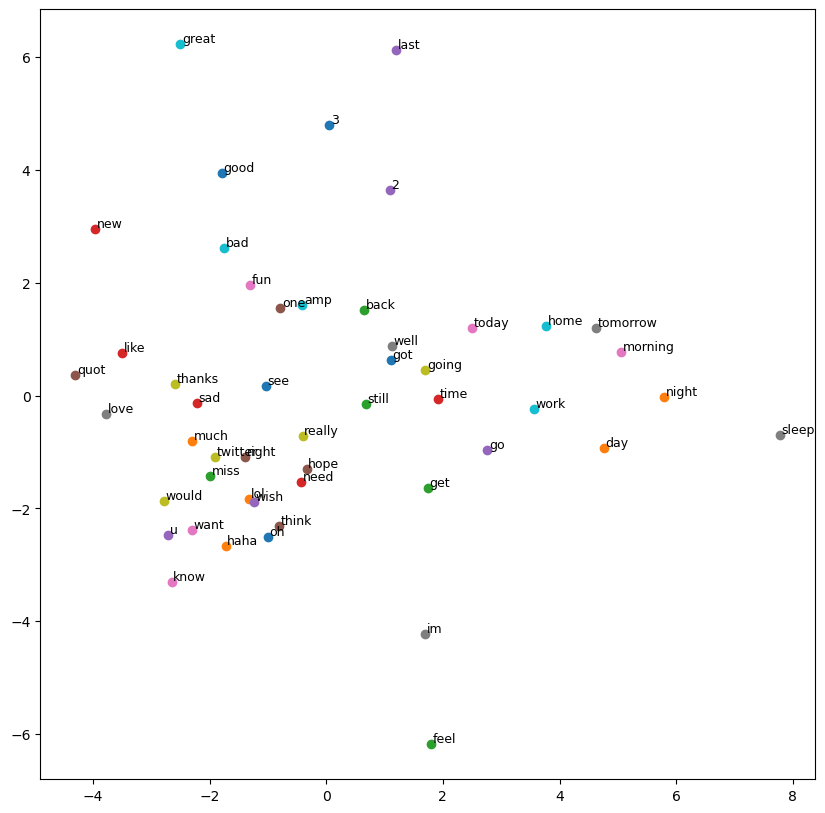

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(pca_vectors[i, 0], pca_vectors[i, 1])
    plt.text(pca_vectors[i, 0]+0.03, pca_vectors[i, 1]+0.03, word, fontsize=9)
plt.show()

Next, we'll use these vector models to predict whether a sentiment is "positive" or "negative."

# Self-Reflective Questions

Answer each question as a group.

## Q1

Which vectors (words) do you notice have high cosine similarity? Feel free to use `most_similar` to answer this?

write answer here

## Q2

Why do we apply PCA to this dataset? 

write answer here

## Q3

Now that we've reduced our vectors to two PCA components, what unsupervised learning algorithm can we apply in order to find clusters of words?

write answer here